# Simple Linear Regression. Minimal example

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
observations=10000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

inputs=np.column_stack((xs,zs))

print(inputs.shape)

(10000, 2)


## Create the targets we will aim at

In [3]:
noise=np.random.uniform(-1,1,(observations,1))
targets=2*xs-3*zs+5+noise
print(targets.shape)

(10000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

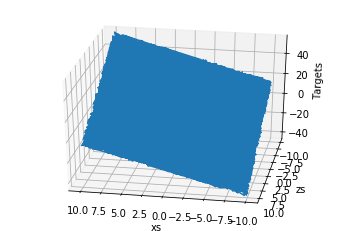

In [4]:
targets=targets.reshape(observations,)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets=targets.reshape(observations,1)

## Initialize variables

In [5]:
init_range=0.1  #our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
weights=np.random.uniform(-init_range,init_range,size=(2,1))
biases=np.random.uniform(-init_range,init_range,size=(1))
print(weights)
print(biases)

[[0.02383785]
 [0.01520274]]
[0.05368594]


## Set a learning rate

In [6]:
learning_rate=0.001

## Train the model

Plan for each iteration:
- First, it calculates the outputs for given weights and biases.
- Second, it calculates a loss function that compares the outputs to the targets. 
- Third, it prints the loss so we can later analyze it.
- Fourth, adjust the weights and the bias is following the gradient descent methodology.

In [7]:
for i in range (100):
 outputs = np.dot(inputs,weights)+biases  #y=xw+b
 deltas = outputs - targets  # records the difference between outputs and targets, usefull as it's part of the update rule 

 loss=np.sum(deltas**2)/2/observations   #calculate the L2-norm loss/2 and divide but the number of observations, giving the average loss per observation, which makes the learning independent of the number of observations.

 print (loss)  #print the loss at each step so observe whether it is decreasing as iterations are being performed. If so, our machine learning algorithm functions well.

 deltas_scaled=deltas/observations #Update the weights and biases so they are ready for the next iteration

 weights=weights-learning_rate*np.dot(inputs.T,deltas_scaled)
 biases=biases-learning_rate*np.sum(deltas_scaled)  #update the biases



230.0540819179025
215.73838425679375
202.36124510322938
189.8610087643264
178.18007157932357
167.26461551715855
157.06435929535525
147.53232586741433
138.62462520177894
130.30025134632496
122.52089283854049
115.25075558341257
108.4563973788202
102.1065733222113
96.17209138276456
90.62567747034166
85.44184937653934
80.59679900425668
76.06828234059499
71.83551666377971
67.87908450830628
64.18084394381745
60.723844752465105
57.49225011682999
54.47126345599515
51.64706007121141
49.006723284866446
46.538184777276705
44.23016884525947
42.07214032460131
40.05425593550307
38.16731882592921
36.40273610259421
34.7524791531491
33.209046576051925
31.76542954667628
30.41507945948821
29.151877696655983
27.970107383298608
26.864426998772366
25.82984572198378
24.861700396741096
23.955634010652172
23.107575588079726
22.313721404206873
21.57051743337769
20.87464295058733
20.22299521033034
19.612675131999247
19.040973925680884
18.50536059654723
18.003470270101097
17.533093284332505
17.092164998388412
16.

What we get is a list of numbers that appears to be in descending order. At each iteration it became lower and lower until it reached a point where it almost stopped changing. This means we have minimized or almost minimized the loss function with respect to the weights and biases. Therefore, we have found a linear function that fits the model well.

## Print weights and biases and see if we have worked correctly.

In [8]:
print(weights,biases)

[[ 1.93010065]
 [-2.90847992]] [0.52793769]


The sought dependece was:

t=f(xs,zs)=2*xs-3zs+5+noise

## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.

The closer this plot is to a 45 degree line, the closer target and output values are.

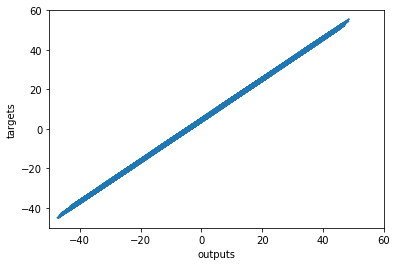

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.xlim([-50,60])
plt.ylim([-50,60])
plt.show()